#### iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv에서 2개 Feature 사용
- 구현프레임워크 : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [169]:
# 모듈 로딩
import torch                        # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn               # 인공신경망 관련 모듈
import torch.nn.functional as F     # 손실, 거래 등 함수 관련 모듈
import torch.optim as optimizer     # 최적화 기법 관련 모듈

import pandas as pd                 # 데이터 파일 분석 관련 모듈
from sklearn.model_selection import train_test_split

In [170]:
# 데이터 로딩 : CSV => DataFrame
DATA_FILE=pd.read_csv('../data/iris.csv',usecols=[0,1,2,3])
irisDF=pd.DataFrame(DATA_FILE)

In [171]:
irisDF.head(2)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


[2] 모델 준비
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형관계 >> 선형모델 nn.Linear 

In [184]:
# in_features : petal.length 1개
# out_features : peral.width 1개
model=nn.Linear(3,1)

nn_model=nn.Sequential(nn.Linear(3,10),
                       nn.ReLU(),
                       nn.Linear(10,50),
                       nn.ReLU(),
                       nn.Linear(50,1))
                   

In [173]:
# 가중치와 절편 확인
for name, param in model.named_parameters():
    print(f'[{name}] {param}\n')

[weight] Parameter containing:
tensor([[0.3163, 0.3326, 0.0454]], requires_grad=True)

[bias] Parameter containing:
tensor([0.4216], requires_grad=True)



[3] 최적화 인스턴스 준비

In [174]:
# 모델의 가중치와 절편을 최적화 => 인스턴스에 전달
adam_optim=optimizer.Adam(model.parameters(), lr=0.1)

[4] 학습 => 개발자가 구현

- [4-1] 데이터셋 Tensor화 진행 : 데이터준비 시 진행하거나 학습 전 진행

In [175]:
irisDF.columns[:-1]

Index(['sepal.length', 'sepal.width', 'petal.length'], dtype='object')

In [176]:
featureTS=torch.from_numpy(irisDF[irisDF.columns[:-1]].values).float()
featureTS.shape

torch.Size([150, 3])

In [177]:
targetTS=torch.from_numpy(irisDF[['petal.width']].values).float()
targetTS.shape

torch.Size([150, 1])

In [178]:
# Train & Test
X_train, X_test, y_train, y_test=train_test_split(featureTS, targetTS, test_size=0.2, random_state=5)

# Train & Valid
X_train, X_val, y_train, y_val=train_test_split(featureTS, targetTS, test_size=0.2, random_state=5)

print(f'TRAIN {X_train.shape}, TEST {X_test.shape}, VAL {X_val.shape}')
print(f'TRAIN {y_train.shape}, TEST {y_test.shape}, VAL {y_val.shape}')

TRAIN torch.Size([120, 3]), TEST torch.Size([30, 3]), VAL torch.Size([30, 3])
TRAIN torch.Size([120, 1]), TEST torch.Size([30, 1]), VAL torch.Size([30, 1])


- [4-2] 학습진행
    * 학습횟수 결정 => 에포크 설정
    * 학습결과 저장 => 손실저장 변수

In [179]:
EPOCH=10

In [180]:
# 테스트/검증 함수
# => 가중치, 절편 업데이트 X, 최적화 미진행
# => 현재 가중치와 절편값으로 테스트 진행
# 모델 학습 함수
def testing(testTS, targetTS, kind='Val'):

    val_history=[]
    
    with torch.no_grad(): # 가중치 및 절편 업데이트 진행 X
        # (1) 학습진행 : forward
        pre_y=model(testTS)

        # (2) 오차계산 : 손실함수
        loss=F.mse_loss(pre_y, targetTS)
        
        # (3) 학습결과 출력 및 저장
        print(f'[{kind}] LOSS : {loss}')
    
    return loss

In [181]:
# 모델 학습 함수
def training(featureTS, targetTS, valTS, valTargetTS):

    loss_history=[[],[]]
    
    for epoch in range(EPOCH):
        # (1) 학습진행 : forward
        pre_y=model(featureTS)

        # (2) 오차계산 : 손실함수
        loss=F.mse_loss(pre_y, targetTS)
        loss_history[0].append(loss.item())

        # (3) 최적화 : 가중치, 절편 업데이트 backward
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()
        
        # (4) 검증 : 모델이 제대로 만들어 지는지 검사용
        val_loss=testing(valTS, valTargetTS)
        loss_history[1].append(val_loss.item())

        # (5) 학습결과 출력 및 저장
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')
        
    return loss_history

In [182]:
# 모델 학습 진행
loss=training(X_train, y_train, X_val, y_val)

[Val] LOSS : 1.065527319908142
[0/10] LOSS : 5.566788196563721
[Val] LOSS : 0.9941235184669495
[1/10] LOSS : 1.4495974779129028
[Val] LOSS : 2.469414234161377
[2/10] LOSS : 0.9756090641021729
[Val] LOSS : 3.0016276836395264
[3/10] LOSS : 2.148993492126465
[Val] LOSS : 2.366734266281128
[4/10] LOSS : 2.6034204959869385
[Val] LOSS : 1.3439247608184814
[5/10] LOSS : 2.0539326667785645
[Val] LOSS : 0.6061830520629883
[6/10] LOSS : 1.1886550188064575
[Val] LOSS : 0.42804986238479614
[7/10] LOSS : 0.6142303347587585
[Val] LOSS : 0.6591986417770386
[8/10] LOSS : 0.5635010004043579
[Val] LOSS : 0.9227480292320251
[9/10] LOSS : 0.8674534559249878


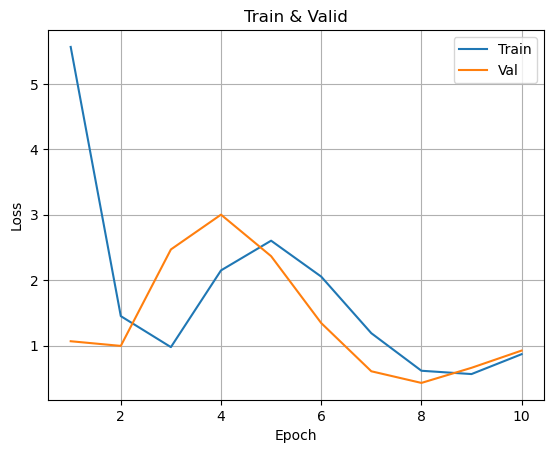

In [183]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt

plt.plot(range(1,11),loss[0], label='Train')
plt.plot(range(1,11),loss[1], label='Val')
plt.title('Train & Valid')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()